# Pyfolio
---

Pyfolio is an open-source Python library originally developed by Quantopian to help traders and analysts evaluate the performance and risk of their trading strategies or investment portfolios. It provides a suite of interactive plots, summary statistics, and tear sheets that give an in-depth look at how a strategy performs over time.


### Key Features

1. **Performance Tear Sheets**  
   - Automatically generate visual reports showing returns, drawdowns, and risk metrics.

2. **Risk Analysis**  
   - Evaluate volatility, max drawdown, and tail risks using built-in metrics.

3. **Transactions & Positions**  
   - Integrate transaction-level data to examine slippage, turnover, and position concentration.

4. **Interactive Visualizations**  
   - Comprehensive matplotlib and plotly-based charts that help identify trends and anomalies.

5. **Easy Integration**  
   - Designed to work seamlessly with popular libraries like pandas, NumPy, and scipy.  
   - Often used alongside backtesting frameworks (e.g., `backtrader`, `zipline`, custom code).

<br>

<br>

## Installation
---

```bash
# Using pip
pip install pyfolio

# Or via conda (if available through your channel)
conda install conda-forge::pyfolio
```

> **Note**: Pyfolio hasn’t seen major updates recently, so if you encounter installation or compatibility issues (especially with newer versions of libraries), consider using a virtual environment or older versions of dependencies.

<br>

<br>

## Basic Usage Example
---

Below is a quick example showing how to create a simple tear sheet using a **pandas Series** of strategy returns.

```python
import pyfolio as pf
import pandas as pd
import numpy as np

# 1. Generate or load your strategy returns (e.g., daily returns)
# For demonstration, let's make a random walk
np.random.seed(42)
random_rets = np.random.normal(0.0005, 0.01, 252)  # ~1 year of trading days
strategy_returns = pd.Series(random_rets, 
                             index=pd.date_range('2022-01-01', periods=252, freq='B'))

# 2. Create a tear sheet
pf.create_simple_tear_sheet(returns=strategy_returns)
```

### What the Tear Sheet Shows

- **Cumulative Return Plot**: Visual trend of how your portfolio grows or declines over time.  
- **Drawdown Plot**: Highlights significant losses from peak values.  
- **Summary Statistics**: Annualized return, annualized volatility, Sharpe ratio, max drawdown, etc.


If you had difficulty installing Pyfolio try uncommenting the cell below and running. Expect it to be verbose ;-)

In [4]:
# %pip install pyfolio-reloaded

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfolio as pf
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.12/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# data
start  = '2018-09-04'
end    = '2019-08-30'
df = yf.download("AAPL", start=start, end=end, auto_adjust=False)
df = df.stack(level=1).rename_axis(['Date', 'Ticker']).reset_index(level=1)

# adjusted open
adj_fac = df['Adj Close'] / df['Close']
df['Adj Open'] = adj_fac * df['Open']

# positions
df['position'] = np.nan
long = df['Adj Open'] > df['Adj Close'].shift(1)
short = df['Adj Open'] < df['Adj Close'].shift(1)
df.loc[long,  'position'] = 1
df.loc[short, 'position'] = -1
df = df.dropna()

#returns
returns = (df['Adj Close'] - df['Adj Open']) / df['Adj Open']
df['strat_returns'] = returns * df.position
cum_strat_returns = (df.strat_returns + 1).cumprod()

[*********************100%***********************]  1 of 1 completed


Start date,2018-09-05
End date,2019-08-29
Total months,11
,Backtest
Annual return,30.569%
Cumulative returns,30.017%
Annual volatility,21.396%
Sharpe ratio,1.35
Calmar ratio,2.03
Stability,0.47
Max drawdown,-15.034%


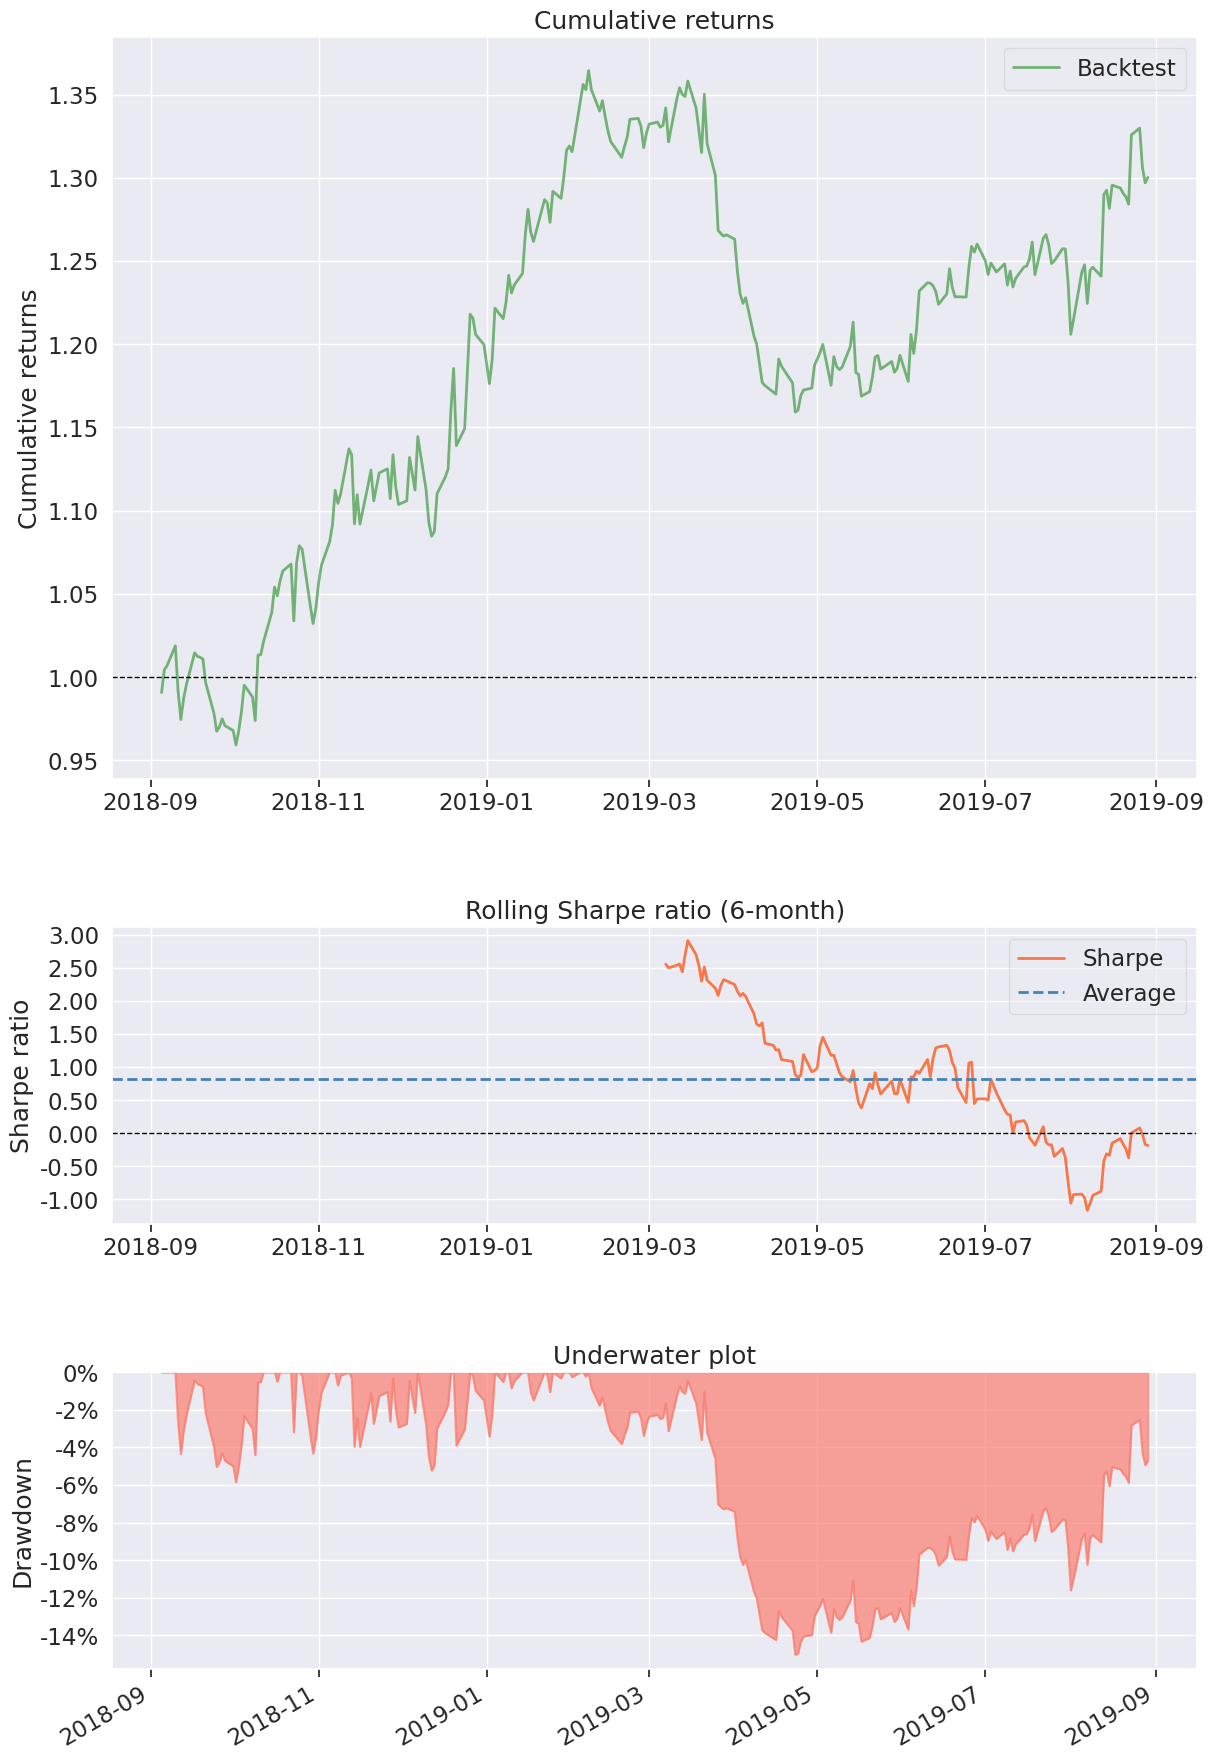

In [3]:
pf.create_simple_tear_sheet(df['strat_returns'])

**Cumulative returns** track the total percentage change in an investment’s value from the start of a given period to the end, offering a straightforward snapshot of overall growth. They are calculated by dividing the final investment value by the initial value and subtracting one (often expressed as a percentage). While this metric highlights how much the investment has gained (or lost) in total, it does not account for the effect of compounding or the length of the holding period. As a result, cumulative returns are often complemented by annualized returns when comparing performance across different time frames.

<br>

**Annual returns** quantify the percentage change in an investment’s value over a single 12-month period, offering a standardized snapshot of performance for that timeframe. Often calculated from daily or monthly returns (and sometimes directly from the net change in value over the year), annual returns help investors compare how different assets or strategies perform on a year-to-year basis. While a useful benchmark, annual returns do not account for multi-year compounding effects. Consequently, many investors also examine **annualized returns**, which smooth out the growth rate across multiple years to better reflect long-term performance.

<br>

The **Sharpe ratio** is a widely used metric for evaluating how well an investment (or portfolio) compensates investors for the amount of risk taken. It compares the excess return of the investment above a risk-free rate (often a short-term government bond yield) to the volatility of that excess return, providing a single figure that captures both performance and risk. Mathematically, the Sharpe ratio is calculated as \(\frac{(R - R_f)}{\sigma}\), where \(R\) is the investment’s average return, \(R_f\) is the risk-free rate, and \(\sigma\) is the standard deviation of the excess returns. A higher Sharpe ratio typically indicates a more attractive risk-adjusted return, whereas a lower ratio may signal that the investment’s additional returns are not sufficiently compensating for its volatility.

<br>

**Maximum Drawdown (MDD)** measures the largest peak-to-trough decline that an investment experiences over a specified period, before it recovers back to a new peak. In practical terms, it shows how much an investor could have lost if they bought at the highest price point and sold at the lowest. By highlighting the worst observed loss, MDD serves as a key risk indicator for portfolios, especially during periods of heightened market volatility. While it doesn’t predict future performance, analyzing MDD helps investors gauge their tolerance for drawdowns and compare the risk profiles of different strategies or assets.

<br>

**Annual Volatility** describes how much an asset’s returns fluctuate in value over a 12-month period. Typically, it is calculated by taking the standard deviation of shorter-term returns (daily or weekly) and scaling it to an annual measure—often by multiplying by the square root of 252 (the approximate number of trading days in a year). A higher annual volatility suggests that an asset experiences larger or more frequent price swings, indicating greater risk. Conversely, a lower annual volatility points to a more stable return pattern. While it does not guarantee future price movements, annual volatility provides a useful benchmark for comparing the relative risk of different investments or strategies.

<br>

## Other Useful Functions

1. **`pf.create_full_tear_sheet()`**  
   - A more comprehensive version, including additional plots like rolling beta against a benchmark, rolling volatility, sector exposures, and more.

2. **`pf.create_returns_tear_sheet()`**  
   - Focused primarily on returns-based metrics, useful for a quick performance overview.

3. **`pf.create_position_tear_sheet()`**  
   - Analyzes your portfolio’s positions over time (requires position-level data).

4. **`pf.create_txn_tear_sheet()`**  
   - Reviews your transactions, helping to gauge turnover, costs, and position changes.

---

## Tips & Best Practices

1. **Benchmarking**  
   - Compare your strategy’s returns to a relevant index (e.g., S&P 500) by passing an additional `benchmark_rets` parameter.

2. **Resampling**  
   - Ensure your returns data is at a consistent frequency (daily vs. monthly). Pyfolio typically expects daily returns.

3. **Data Alignment**  
   - Make sure the index on your returns aligns with the index on any benchmark or position-level data (trading days, same start and end dates, etc.).

4. **Handling Missing Data**  
   - Remove or appropriately fill NaN values. Gaps in data can lead to skewed statistics or plots.

5. **Version Compatibility**  
   - Pyfolio depends on specific versions of pandas, matplotlib, and other libraries. If you experience errors, try installing older library versions that match Pyfolio’s requirements (e.g., `pandas<1.3`).

---

## Conclusion

Pyfolio is a handy tool for **performance attribution** and **risk analysis** if you’re running systematic trading strategies or maintaining an active investment portfolio. By creating automated tear sheets, it **streamlines** the process of evaluating how well a strategy is doing, whether it aligns with its stated risk profile, and where there’s room for improvement. 

Although development has slowed, **Pyfolio** remains a **go-to** for many quant traders looking for a quick, interactive way to analyze returns and risk characteristics. If you run into compatibility issues, there are forks and community-driven solutions on GitHub that may offer updated versions or additional features.